# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [51]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [52]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [53]:
apple = data

### Step 4.  Check out the type of the columns

In [54]:
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [55]:
apple.Date = pd.to_datetime(apple.Date)
apple.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 6.  Set the date as the index

In [56]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [57]:
len(apple.index.value_counts()) == len(apple)
# True이므로 duplicate dates는 없음.

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [58]:
apple.index = reversed(apple.index)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
1980-12-12,96.27,96.80,93.92,95.35,65130000,95.35
1980-12-15,94.14,95.99,94.10,95.97,56305400,95.97
1980-12-16,93.67,94.10,93.20,94.03,22891800,94.03
1980-12-17,93.87,94.06,93.09,93.48,28420900,93.48
1980-12-18,93.52,94.07,93.13,93.52,38170200,93.52


### Step 9. Get the last business day of each month

In [59]:
pd.date_range('1980-12-12', '2014-08-08', freq='M')

DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
               '2014-06-30', '2014-07-31'],
              dtype='datetime64[ns]', length=404, freq='M')

### Step 10.  What is the difference in days between the first day and the oldest

In [60]:
print(apple.index.max()-apple.index.min())

12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [61]:
print(len(pd.date_range('1980-12-12', '2014-08-08', freq='M')))

404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

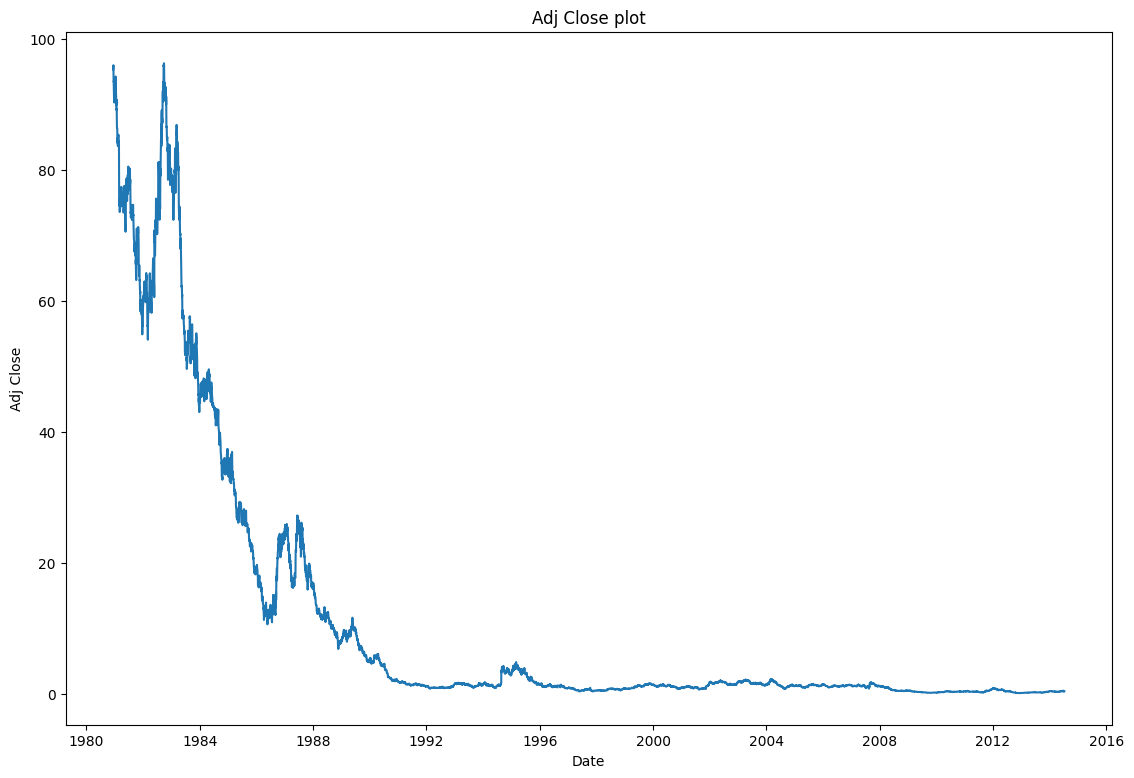

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Adj Close plot')
plt.show()